# Klasifikasi Gambar Sensor EWS Trafo Menggunakan Metode CNN

## Alfendio Alif Faudisyah - FTI UKSW

# Import Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Build and Recognize Dataset

## Dataset Standardization

In [2]:
# 256 X 256 to 
# UKURAN GAMBAR DIPERBESAR UNTUK MEMBEDAKAN MODUL MQ 4 DAN MQ 8

img_height = 256 
img_width = 256
batch_size = 32 

## Build Dataset

In [3]:
training_ds = keras.preprocessing.image_dataset_from_directory('C:/Users/alfen/OneDrive/Pictures/Dataset Sensor EWS Trafo_4/Training', 
            image_size=(img_height, img_width), batch_size=batch_size)
            
testing_ds = keras.preprocessing.image_dataset_from_directory('C:/Users/alfen/OneDrive/Pictures/Dataset Sensor EWS Trafo_4/Testing',        
            image_size=(img_height, img_width), batch_size=batch_size)

Found 5928 files belonging to 6 classes.
Found 1482 files belonging to 6 classes.


## Find Class Names

In [4]:
class_names = training_ds.class_names
print("Training dataset: ",class_names)

class_names = testing_ds.class_names
print("Testing dataset: ",class_names)

Training dataset:  ['CT PZEM 044t', 'LM 35', 'MQ 4', 'MQ 8', 'PZEM 044t', 'Thermocouple Type K']
Testing dataset:  ['CT PZEM 044t', 'LM 35', 'MQ 4', 'MQ 8', 'PZEM 044t', 'Thermocouple Type K']


## Dataset Visualization

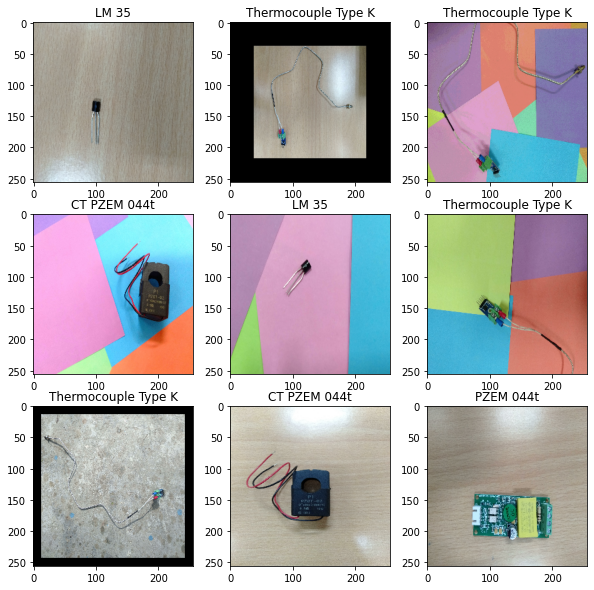

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8")) # convert bentuk image vektor RGB ke uint8
        plt.title(class_names[labels[i]])

## Tuning

In [6]:
# Tune dataset 
# Membuat data ada di memori
AUTOTUNE = tf.data.AUTOTUNE

train_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Build Classification Model

## Create CNN Model

In [7]:
# Class target < - 6 class
num_classes = 6

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)), # rescaling menjadi greyscale
    layers.Conv2D(16, 3, padding='same', activation='relu'), # membuat convolutional layer 2D
    layers.MaxPooling2D(), # membuat max pooling layer 2D -> menyimpan feature yang akan kita simpan, menyimpan pooling dari conv 2D
    layers.Conv2D(32, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(), 
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2), # dropout layer -> menghilangkan neuron yang tidak terlalu penting, mengurangi overfitting
    layers.Flatten(), # flatten layer -> mengubah bentuk 2D menjadi array 1D
    layers.Dense(128, activation='relu'), # mencari hubungan dari maxpoling 2D yang didapatkan, flatten
    layers.Dense(num_classes) # output layer
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [9]:
# Compile Model CNN
# Compile model untuk melakukan training
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

# Train Model

In [10]:
# Train Model 
epochs = 15

# Simpan dalam history
history = model.fit( 
    training_ds,
    epochs=epochs
)

Epoch 1/15
186/186 [==============================] - 273s 1s/step - loss: 1.2322 - accuracy: 0.5197
Epoch 2/15
186/186 [==============================] - 200s 1s/step - loss: 0.3879 - accuracy: 0.8650
Epoch 3/15
186/186 [==============================] - 216s 1s/step - loss: 0.1807 - accuracy: 0.9371
Epoch 4/15
186/186 [==============================] - 194s 995ms/step - loss: 0.1097 - accuracy: 0.9639
Epoch 5/15
186/186 [==============================] - 204s 1s/step - loss: 0.0759 - accuracy: 0.9745
Epoch 6/15
186/186 [==============================] - 207s 1s/step - loss: 0.0505 - accuracy: 0.9836
Epoch 7/15
186/186 [==============================] - 190s 975ms/step - loss: 0.0719 - accuracy: 0.9749
Epoch 8/15
186/186 [==============================] - 183s 936ms/step - loss: 0.0446 - accuracy: 0.9845
Epoch 9/15
186/186 [==============================] - 201s 1s/step - loss: 0.0149 - accuracy: 0.9961
Epoch 10/15
186/186 [==============================] - 182s 932ms/step - loss: 0.0

## Training Visualization

Text(0.5, 1.0, 'Training Loss')

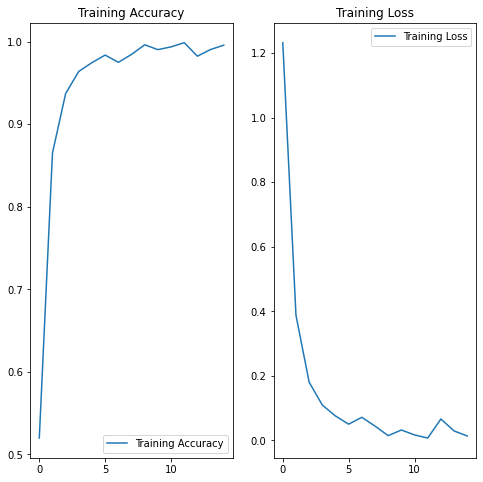

In [11]:
# Visualisasi Training Akurasi 
acc = history.history['accuracy']

# Visualisasi Training Loss
loss = history.history['loss']

# Epochs 
epochs_range = range(epochs)
plt.figure(figsize=(8, 8)) # Tampilan dalam figure

plt.subplot(1, 2, 1) # Tampilan sisi per sisi
plt.plot(epochs_range, acc, label='Training Accuracy') # Plot akurasi training
plt.legend(loc='lower right') 
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss') # Plot loss training
plt.legend(loc='upper right')
plt.title('Training Loss')

# Testing Model

## Testing Accuracy

In [12]:
test_loss, test_acc = model.evaluate(testing_ds, verbose=2)
print('\nTest accuracy:', test_acc)

47/47 - 54s - loss: 1.4500 - accuracy: 0.7530 - 54s/epoch - 1s/step

Test accuracy: 0.7530364394187927


## Testing Visualization

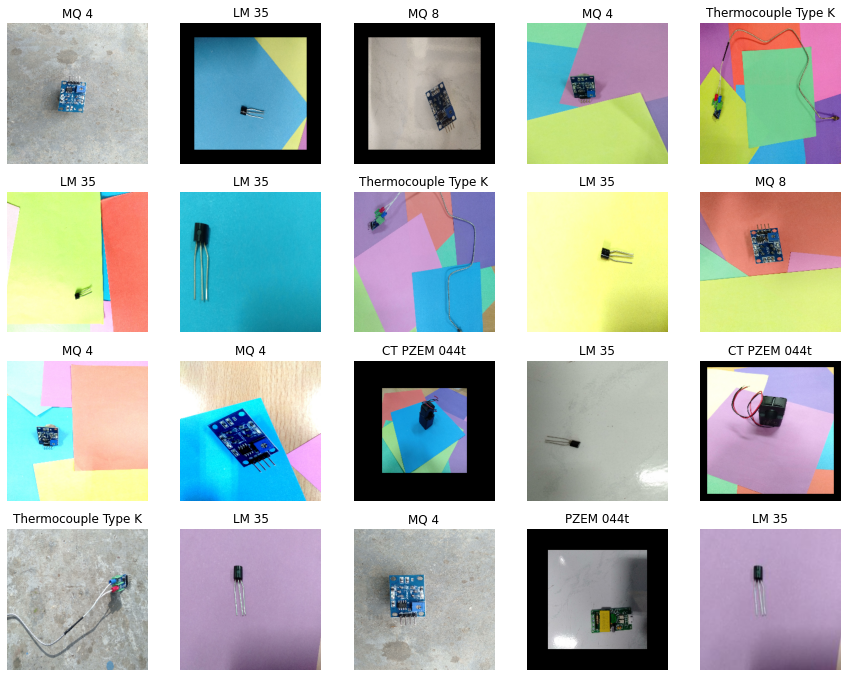

In [13]:
plt.figure(figsize=(15, 15))
for images, labels in testing_ds.take(1):
    for i in range(20):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Prediction

## Get the Label Names and Convert Into a NumPy Ainrray

In [14]:
class_names = np.array(class_names)

print(class_names)

['CT PZEM 044t' 'LM 35' 'MQ 4' 'MQ 8' 'PZEM 044t' 'Thermocouple Type K']


## Create an Image Batch and Make Predictions

In [15]:
image_batch, label_batch = next(iter(testing_ds))


image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()

predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]

print(predicted_class_names)

1/1 [==============================] - 1s 679ms/step
['CT PZEM 044t' 'MQ 8' 'LM 35' 'LM 35' 'LM 35' 'LM 35' 'PZEM 044t' 'MQ 8'
 'CT PZEM 044t' 'CT PZEM 044t' 'PZEM 044t' 'Thermocouple Type K' 'MQ 8'
 'Thermocouple Type K' 'LM 35' 'MQ 4' 'LM 35' 'CT PZEM 044t' 'MQ 8' 'MQ 8'
 'MQ 8' 'MQ 4' 'PZEM 044t' 'CT PZEM 044t' 'CT PZEM 044t' 'LM 35'
 'CT PZEM 044t' 'MQ 8' 'PZEM 044t' 'LM 35' 'LM 35' 'PZEM 044t']


## Print True Labels and Predicted Indices

In [16]:
print("Labels:           ", label_batch)
print("Predicted labels: ", predicted_ids)

Labels:            [0 3 1 1 1 1 4 3 0 0 4 5 2 5 1 3 1 0 2 3 2 3 4 0 0 1 0 3 4 1 1 4]
Predicted labels:  [0 3 1 1 1 1 4 3 0 0 4 5 3 5 1 2 1 0 3 3 3 2 4 0 0 1 0 3 4 1 1 4]


## Plot Model Predictions

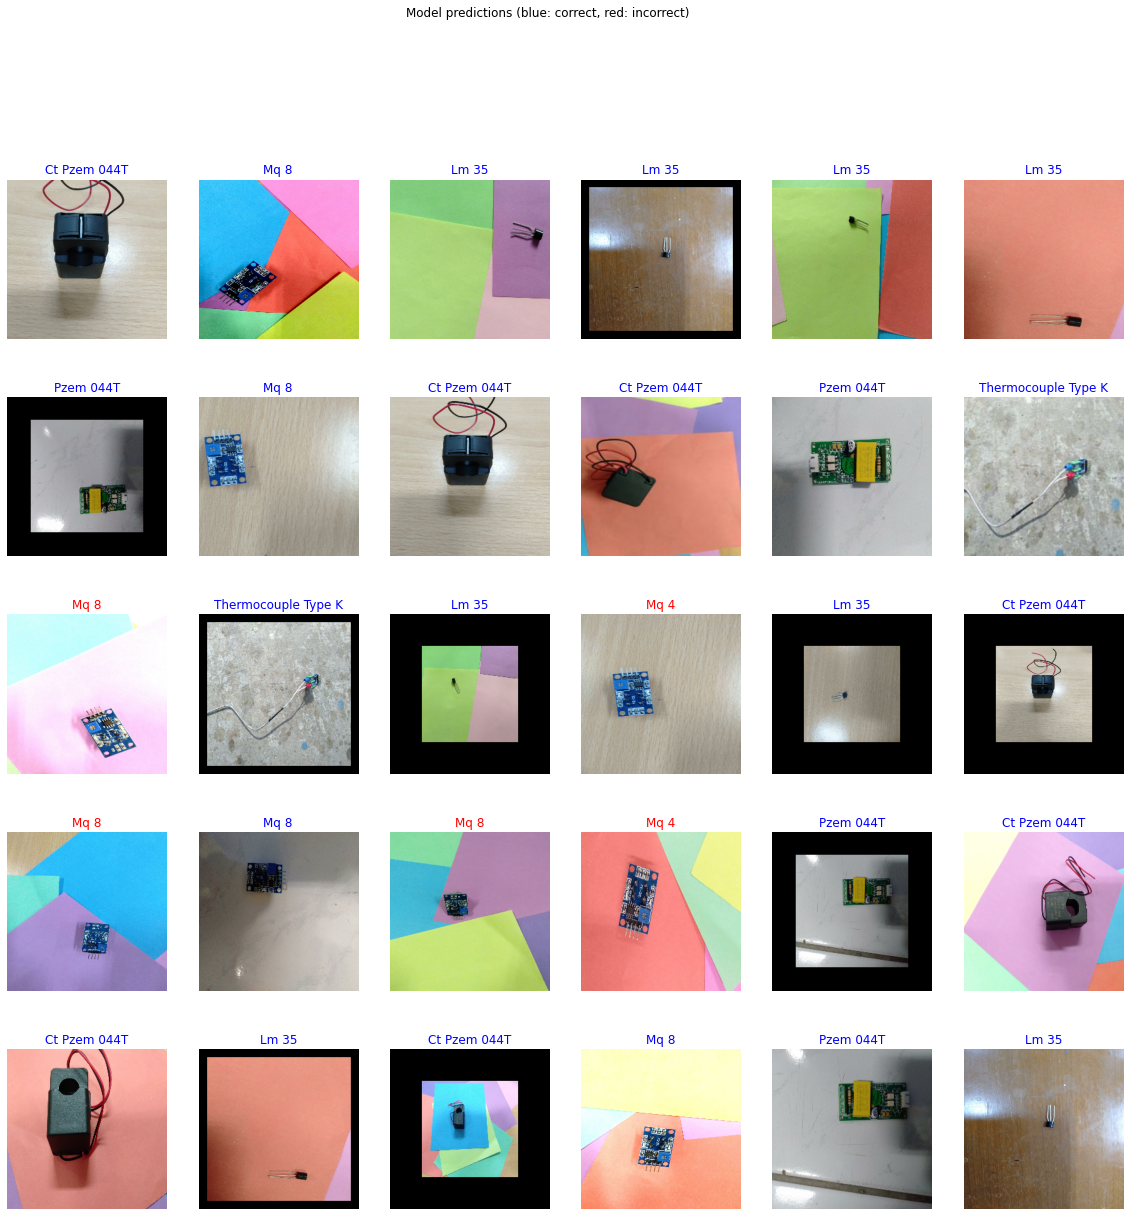

In [17]:
plt.figure(figsize=(20, 20))
for n in range(30):
    plt.subplot(5, 6, n+1)
    plt.subplots_adjust(hspace=0.)
    plt.imshow(image_batch[n].astype("uint8"))
    color = "blue" if predicted_ids[n] == label_batch[n] else "red"
    plt.title(predicted_class_names[n].title(), color=color)
    plt.axis('off')
    plt.suptitle("Model predictions (blue: correct, red: incorrect)")

# Confidence Score

In [18]:
test_url = "https://static-01.daraz.pk/p/e44b816c6cddd662218fe8a6ab226594.jpg"
test_path = tf.keras.utils.get_file('', origin=test_url)

img = keras.preprocessing.image.load_img(test_path, target_size=(img_height, img_width))

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

prediction = model.predict(img_array)
score = tf.nn.softmax(prediction[0])

print("Gambar ini adalah {} dengan akurasi {:.2f}%.".format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 1s 853ms/step
Gambar ini adalah CT PZEM 044t dengan akurasi 100.00%.


# Save the model

In [19]:
model.save ("Save model/model_percobaan_11")

INFO:tensorflow:Assets written to: Save model/model_percobaan_11\assets


INFO:tensorflow:Assets written to: Save model/model_percobaan_11\assets


In [20]:
model.save ("Save model/model_percobaan_11.h5")

# Note

> Total dataset: 7410
- Training (80%) = 5928
- Testing (20%) = 1482

> Jenis:
- CT = Sensor
- PZEM 044t = Sensor
- Thermocouple Type K = Driver (Bagian hijau MAX6675), Sensor yang panjang
- MQ 4 = Cuma modul karena sensornya mirip dengan MQ8
- MQ 8 = Cuma modul karena sensornya mirip dengan MQ4
- LM 35 = Sensor

# Alfendio Alif Faudisyah&copy;
## 2022